# **9-1. Convolution**

## **Convolution(합성곱)이란?**
이미지 위에서 stride 값 만큼 filter(kernel)을 이동시키면서 겹쳐지는 부분의 각 원소의 값을 곱해서 모두 더한 값을 출력으로 하는 연산.   
즉, 입력값 이미지의 모든 영역에 같은 필터를 반복적으로 적용해, 패턴을 찾아 처리하는 연산!
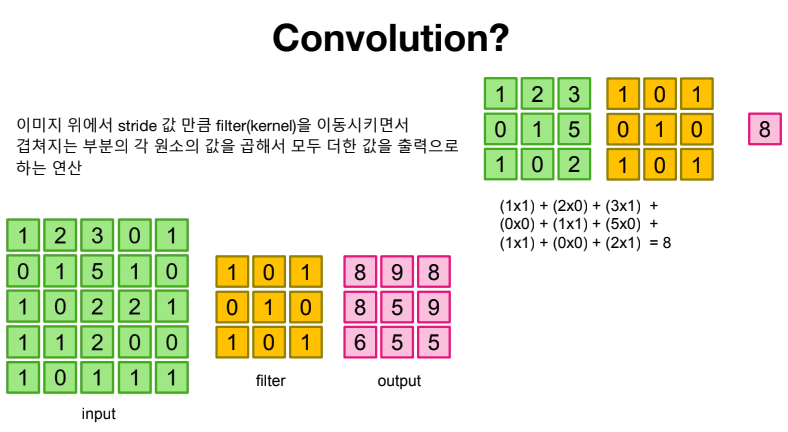    
🔎 **왜 filter를 커널이라고 불러? (chat gpt의 답변)**       
1. In mathematics, a kernel refers to a function or a matrix that is used to perform operations like convolution or transformation. In the context of convolutional filters, the kernel represents the weights or coefficients that are applied to the input image during the convolution operation.
2. 옛날 부터 썼다
3. 직관적으로 표현할 수 있다   

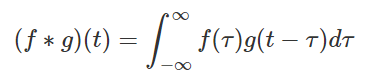    

합성곱을 하는 방법은,   
1. 하나의 함수를 반전시킨 후, 이동시킨다.
2. 좌, 우측으로 이동시키며 두 함수를 곱해 적분한다.(면적을 구한다)


## **Stride and Padding**
- stride: filter를 한 번에 몇 칸 이동시킬 것인가
- padding: data 바깥을 둘러싸는 zero-padding   
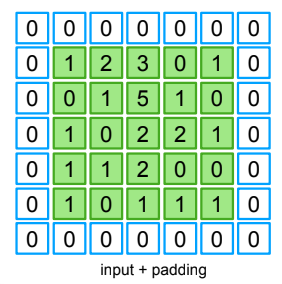

### **Pytorch nn.Conv2d**
<code>torch.nn.Conv2d(input channel, output channel, 커널 크기)</code>

### **Input 형태**
Input type은 torch.Tensor여야 하고,    
shape은 반드시! (N x C x H x W)!
- N: batch size
- C: channel
- H: height
- W: width

## **Convolution의 output 크기**
$$Output\,size = \frac{input\,size - filter\,size + (2 * padding)}{Stride}$$

- padding 0, stride 1일 때
    - output W = input W - filter W + 1
    - output H = input H - filter H + 1
- padding이 0이 아닐 때
    - output W = input W + padding
    - output H = input H - padding


### **잠깐! CNN이 뭐예요?**
CNN이란, NN에 Convolution 전처리 작업이 들어간 Neuron Network 모델.   
일반 DNN는 1차원 형태의 data만 다룰 수 있어서, 2차원 입력이 들어오면 flatten으로 1차원 한 줄 data로 만들어야 함.   
이 때, 이미지의 공간적(spatial), 지역적(topological)정보가 손실되고, 추상과 과정 없이 바로 연산하게 됨.   

🔎 **추상화 단계**
- 점, 선, 면: 추상화 단계가 낮다
- 눈, 코, 입: 추상화 단계가 높다

은닉층이 깊을수록 추상화 단계가 높은 특징을 사용

## **Neuron(Perceptron)과 Convolution**
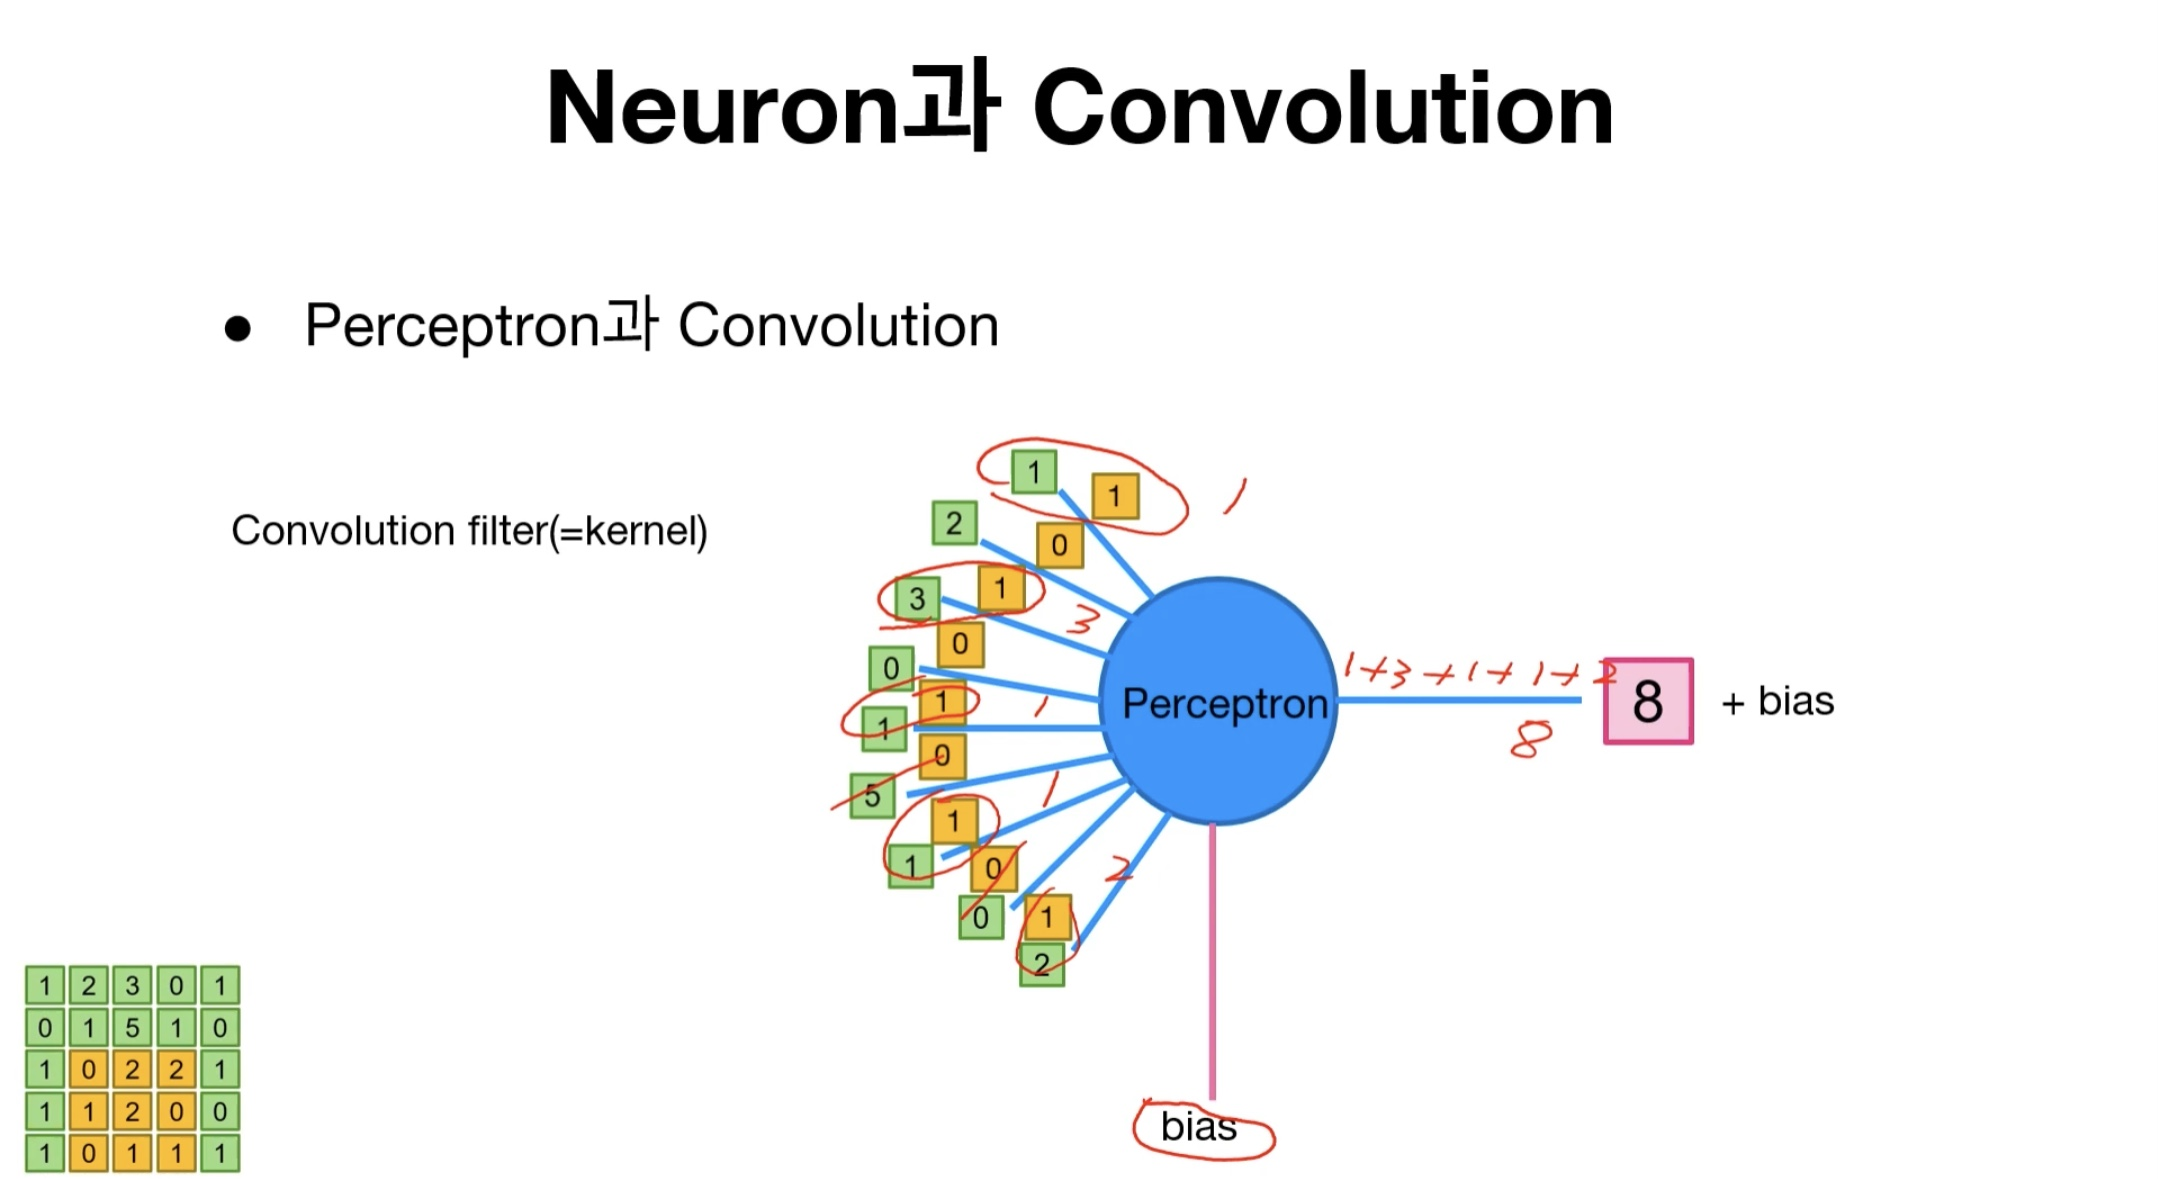
1. 필터가 Weight로 뿌려진다.(들어간다)
2. 뿌려진 필터에 각각 x가 곱해진다.
3. Convolution 진행, bias가 더해져서 결과값 반환(필터도 bias가 있을 수 있다.)


## **Pooling**

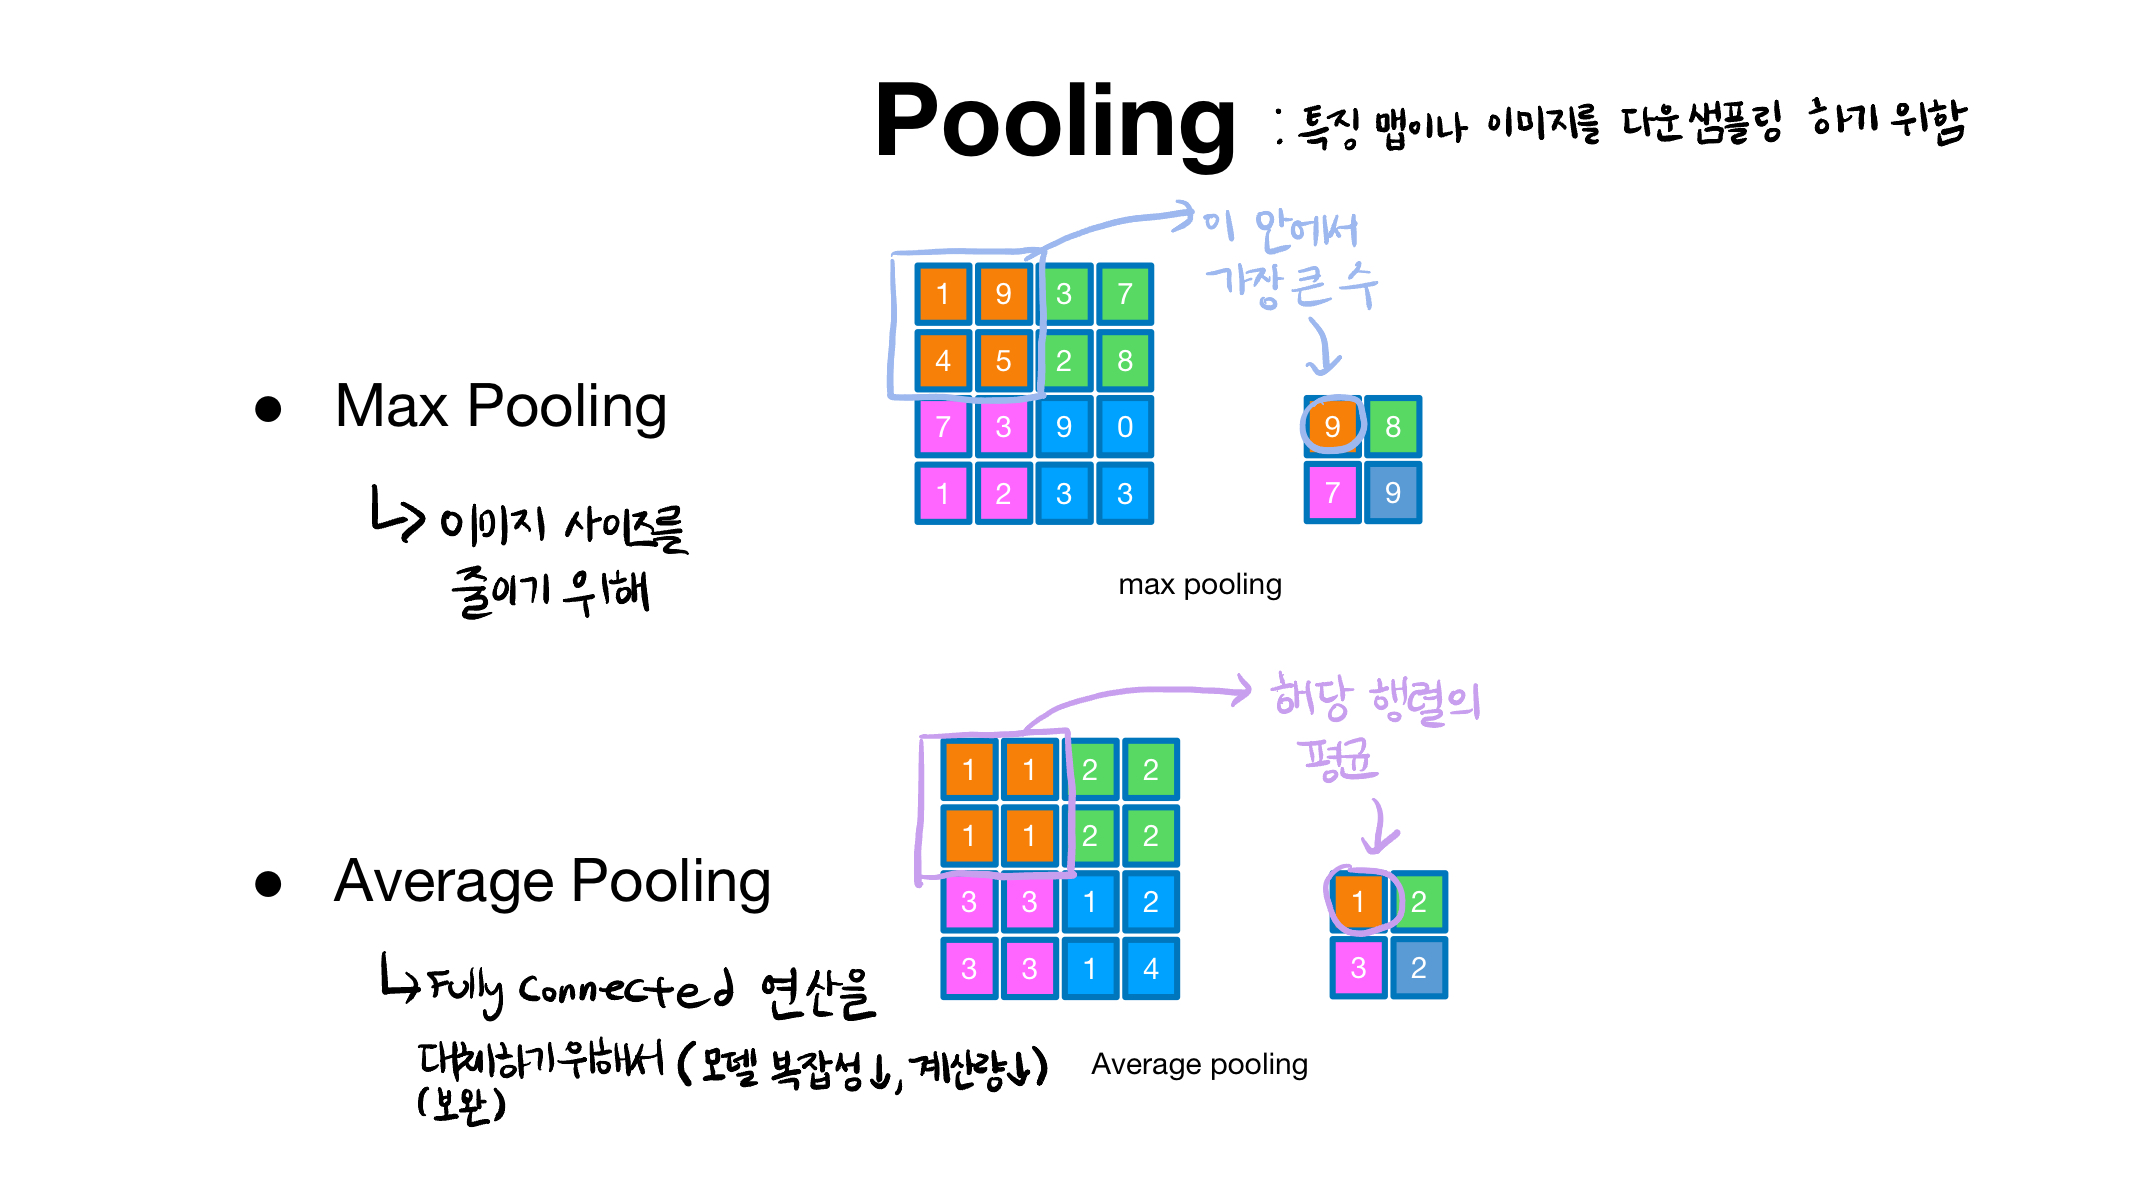

### **MaxPool2d**
<code>torch.nn.MaxPool2d(커널 크기)</code>    
2D Max Pooling 함수. 나머지 속성들은 디폴트 값이 있어서, 커널 크기만 잘 설정해 주면 된다고 하셨습니다.

## **CNN implementataion**
직접 해 보자!

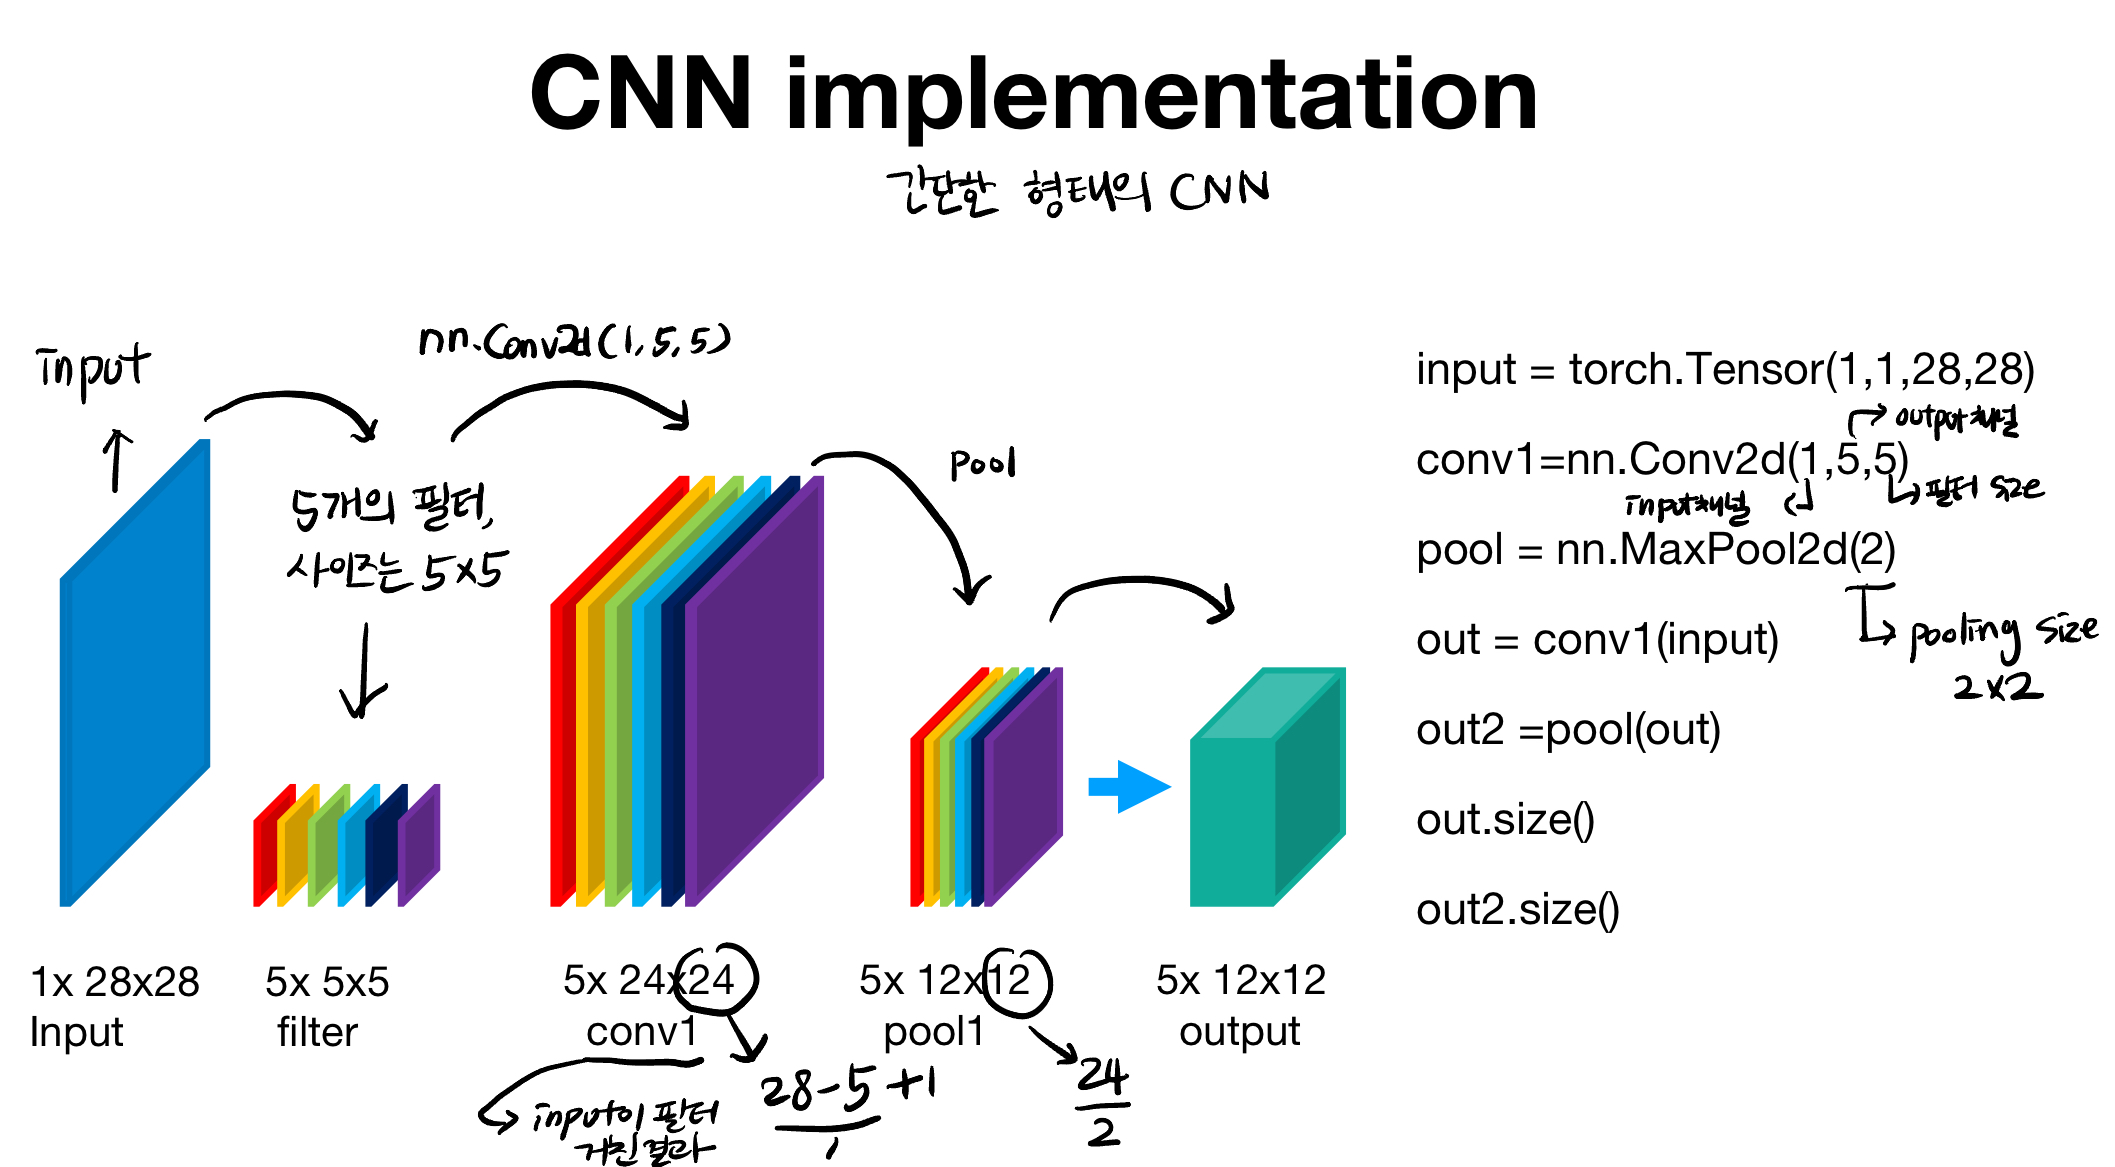

In [ ]:
import torch
import torch.nn as nn
input = torch.Tensor(1,1,28,28)
conv1 = nn.Conv2d(1,5,5)
pool = nn.MaxPool2d(2)
out1 = conv1(input)
out2 = pool(out1)

out1.size()
out2.size()

torch.Size([1, 5, 12, 12])

## **추가) Cross-correlation이 뭐예요?**
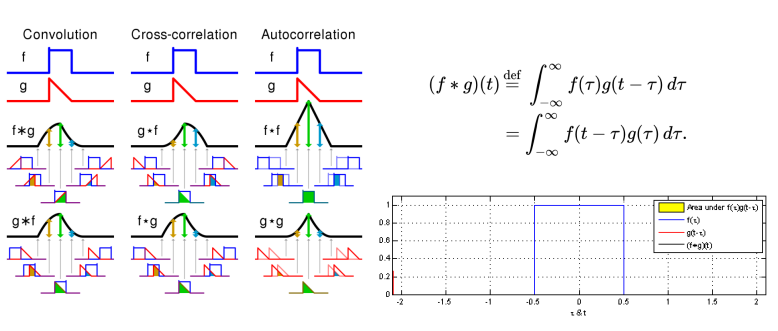


일단 Convolution은 위에서 언급했듯이, f가 이미지고 g가 필터라고 할 때 필터를 점점 좌 또는 우로 움직여 filter값이 이미지와 얼마나 겹치는지를 적분을 통해 구하는 방식이다.   
근데, Convolution을 하려면 일단 둘 중 하나를 뒤집어야 한다.(-τ)     
그래서 **필터나 이미지가 뒤집어진 상태**로 이동할 수 밖에 없는데,   
필터나 이미지를 **뒤집지 않고 이동**시키는 방법이 **Cross-correlation**이다.    
(Cross-correlation 기호는 ⭐모양이다...)